## Statystyka i Analiza danych
# Laboratorium 6 - Wykresy

Pomocnicze funkcje do rysowania wykresów

In [24]:
plot_crit  <- function(t, crit, df = 0) {
    dist  <- function(x, df) {
        if (df == 0)
            dnorm(x)
        else 
            dt(x, df)
    }
    x_max  <- max(3, abs(t))
    x  <- seq(-x_max, x_max, 0.1)
    y  <- dist(x, df)
    plot(x, y, type="l", main=paste(crit, " "))
    abline(v = t, col="blue", lty=2)
    for (c in crit) {
        if (c > 0) {
            x_c  <- c(c, c, x[x > c], max(x))
            y_c  <- c(0, dist(c, df), y[x > c], 0) 
        } else {
            x_c  <- c(min(x), x[x < c], c, c)
            y_c  <- c(0, y[x < c], dist(c, df), 0)             
        }
        polygon(x_c, y_c, border=NA, col="firebrick1")
    }
}

In [25]:
plot_norm  <- function(z, alpha, type = "ne") {
    if (type == "ne") {
        z_crit  <- qnorm(alpha/2, lower.tail = FALSE)
        plot_crit(z, c(-z_crit, z_crit))
    } else {
        z_crit  <- qnorm(alpha, lower.tail = FALSE)
        plot_crit(z, ifelse(type == "gt", z_crit, -z_crit))
    }
}

In [26]:
plot_t  <- function(t, alpha, df, type = "ne") {
    if (type == "ne") {
        t_crit  <- qt(alpha/2, df, lower.tail = FALSE)
        plot_crit(t, c(-t_crit, t_crit))
    } else {
        t_crit  <- qt(alpha, df, lower.tail = FALSE)
        plot_crit(t, ifelse(type == "gt", t_crit, -t_crit))
    }
}

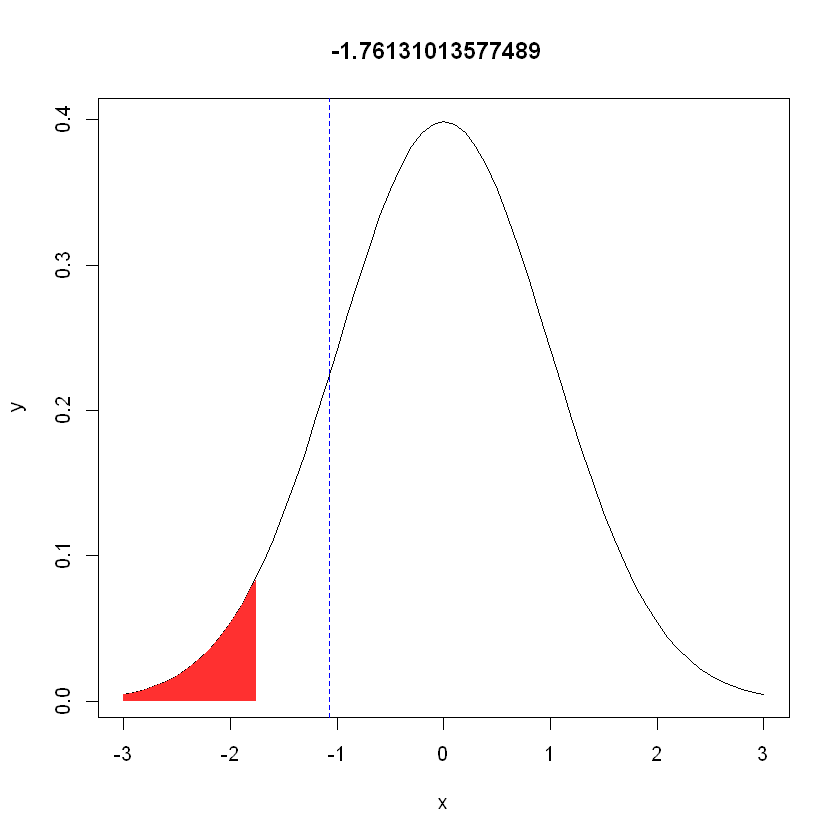

In [27]:
plot_t(-1.07, 0.05, 14, "lt")

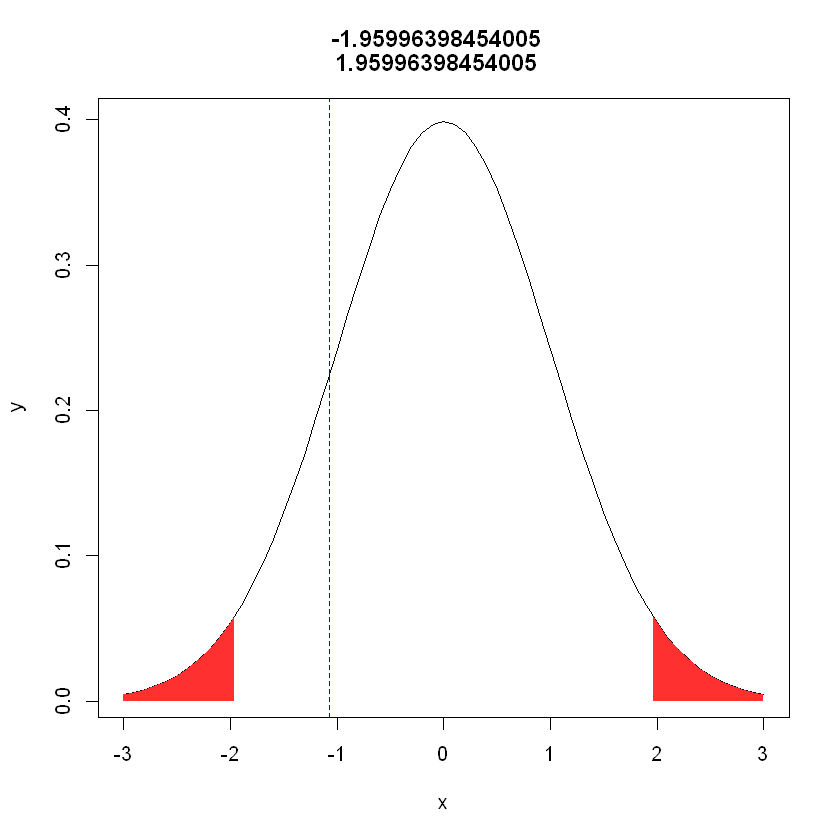

In [30]:
plot_norm(-1.07, 0.05, "ne")